In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [23]:
rawData = pd.read_csv('./python/data/train.csv')

# 타이타닉 시각화

## 결측치 확인

<AxesSubplot:>

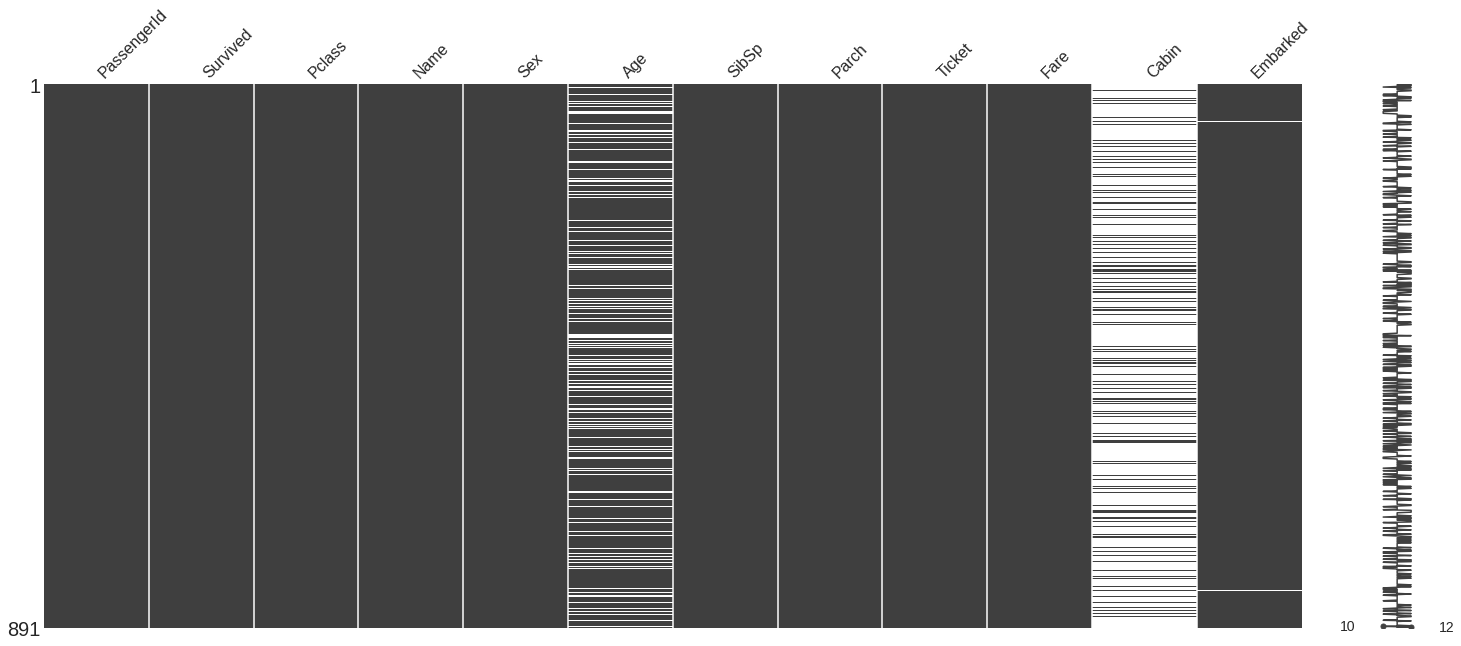

In [24]:
missingno.matrix(rawData)

## 상관계수
- 공분산

In [25]:
rawData.corr().style.background_gradient()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


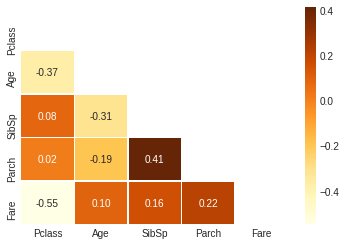

In [26]:
cor = rawData[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    cor, annot=True, fmt='.2f', cmap='YlOrBr', mask=mask, linewidths=0.5
)
plt.show()

### 변수
 - machine learning: Feature
 - 통계적 모형: 변수(variable)
 - X: 입력변수, 확률변수, 독립변수, 설명변수
 - Y: 출력변수, 종속변수, 정답(label)

# Y에 미치는 영향

In [27]:
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 생존자 정보 확인

0    549
1    342
Name: Survived, dtype: int64

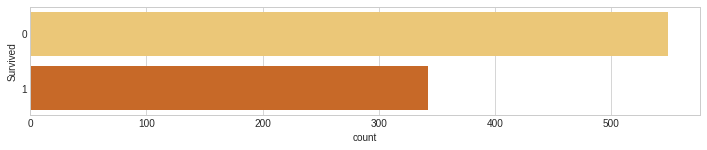

In [28]:
plt.style.use('seaborn-whitegrid')
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,2))
display(rawData.Survived.value_counts())
# sns.countplot(x='Survived', data=rawData)
sns.countplot(y='Survived', data=rawData, palette='YlOrBr')
plt.show()

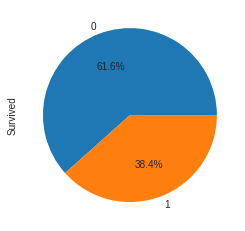

In [29]:
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

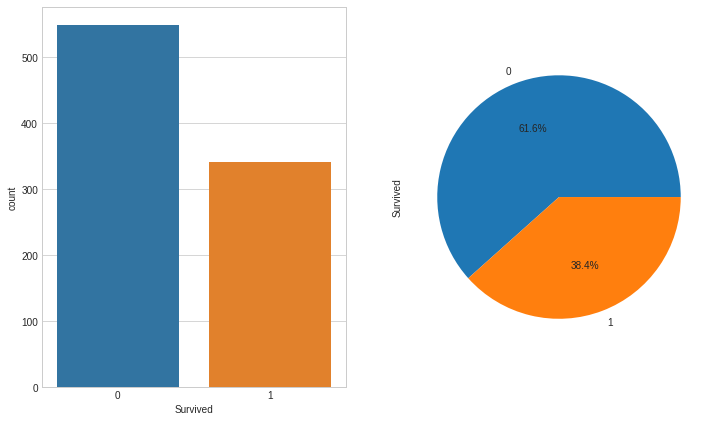

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.countplot(x='Survived', data=rawData, ax=ax[0])
rawData.Survived.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
plt.show()

## Pclass가 생존에 미치는 영향
- 높은 등급의 클래스 일수록 생존에 유리하지 않았을까?
- 숫자가 낮을수록 높은 등급
- 순위형 변수(범주형 이지만, 순서를 가지고 있는)

In [31]:
rawData.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [32]:
pd.crosstab(rawData.Pclass, rawData.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


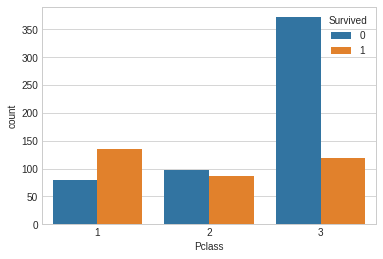

In [33]:
sns.countplot('Pclass', hue='Survived', data=rawData)
plt.show()

In [34]:
rawData.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

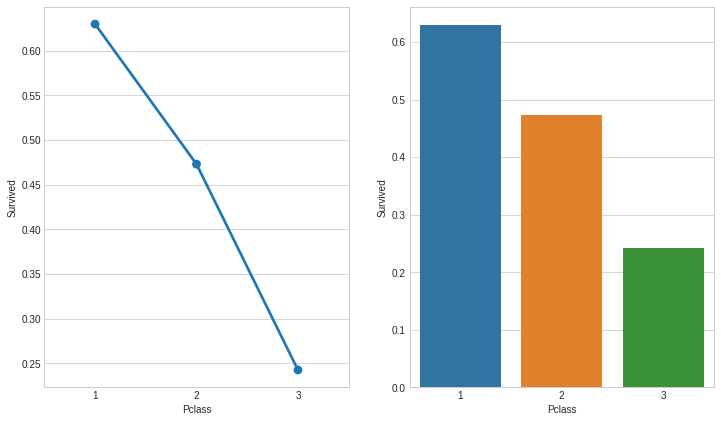

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
sns.pointplot(x='Pclass', y='Survived', data=rawData, ax=ax[0], ci=None)
sns.barplot(x='Pclass', y='Survived', data=rawData, ax=ax[1], ci=None)
plt.show()

- 등급이 높을수록 생존에 유리했음을 알 수 있다. 

## 성별 생존여부

In [36]:
rawData.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [37]:
pd.crosstab(rawData.Sex, rawData.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


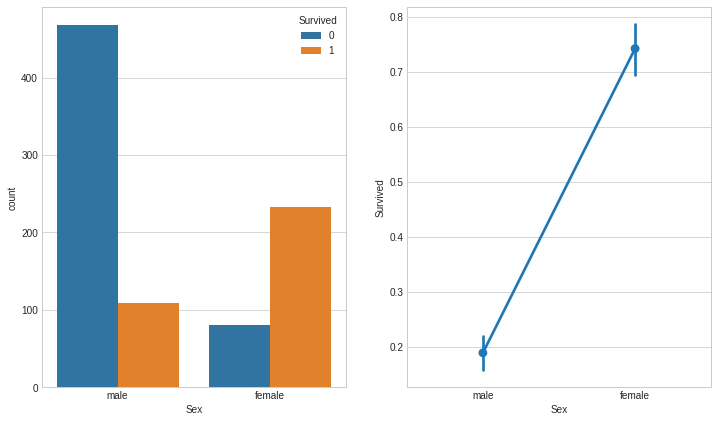

In [38]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot('Sex', hue='Survived', data=rawData)

plt.subplot(1,2,2)
sns.pointplot(x='Sex', y='Survived', data=rawData)
plt.show()

## 나이에 따른 생존여부
- 나이가 어린(1세 이하) 승객들은 성별과 상관없이 생존율이 높지 않았을까?

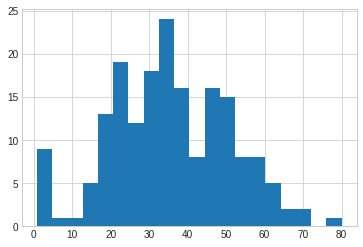

In [39]:
plt.hist('Age', data=rawData.dropna(), bins=20)
plt.show()

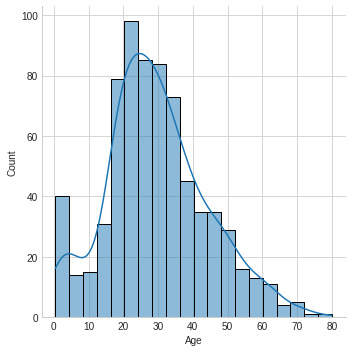

In [40]:
sns.displot(rawData['Age'].dropna(), bins=20, kde=True)
plt.show()

### 나이대별 생존자의 분포

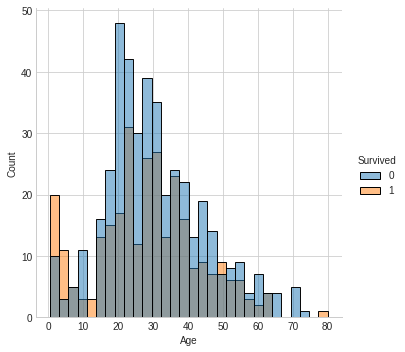

In [41]:
# sns.distplot(rawData[rawData['Survived'] == 1].Age, bins=20, label='Survived', kde=False)
# sns.distplot(rawData[rawData['Survived'] == 0].Age, bins=20, label='Not Survived', kde=False)
# plt.legend()
sns.displot(data=rawData, x='Age', hue='Survived', bins=30)
# sns.histplot(data=rawData, x='Age', hue='Survived')
plt.show()

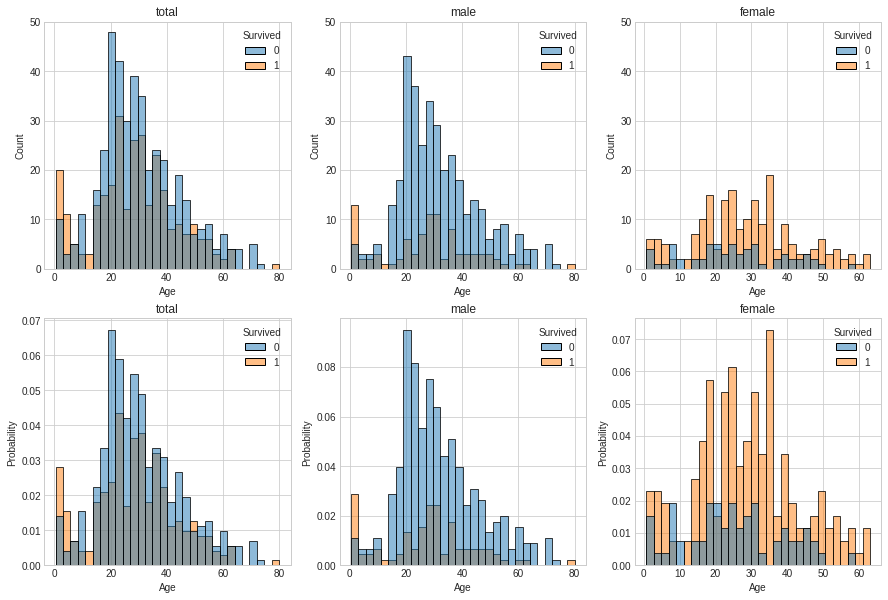

In [42]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.histplot(data=rawData, x='Age', hue='Survived', bins=30, ax=ax[0,0])
ax[0,0].set_title('total')
ax[0,0].set_ylim(0, 50)

sns.histplot(data=rawData[rawData['Sex']=='male'], x='Age', hue='Survived', bins=30, ax=ax[0,1])
ax[0,1].set_title('male')
ax[0,1].set_ylim(0, 50)

sns.histplot(data=rawData[rawData['Sex']=='female'], x='Age', hue='Survived', bins=30, ax=ax[0,2])
ax[0,2].set_title('female')
ax[0,2].set_ylim(0, 50)

sns.histplot(data=rawData, x='Age', hue='Survived', bins=30, stat='probability', ax=ax[1,0])
ax[1,0].set_title('total')

sns.histplot(data=rawData[rawData['Sex']=='male'], x='Age', hue='Survived', 
             bins=30, stat='probability', ax=ax[1,1])
ax[1,1].set_title('male')

sns.histplot(data=rawData[rawData['Sex']=='female'], x='Age', hue='Survived', 
             bins=30, stat='probability', ax=ax[1,2])
ax[1,2].set_title('female')

plt.show()

- 나이가 어린 승객은 성별과 상관없이 생존에 유리했음을 알 수 있다. 
- 여성승객은 나이와 상관없이 생존에 유리했음을 알 수 있다. 

## 이름분석

### 미들네임

In [43]:
rawData.Name.value_counts()

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)    1
Johnson, Miss. Eleanor Ileen                                1
Butt, Major. Archibald Willingham                           1
Murdlin, Mr. Joseph                                         1
Augustsson, Mr. Albert                                      1
                                                           ..
Bracken, Mr. James H                                        1
Giles, Mr. Frederick Edward                                 1
Jensen, Mr. Svend Lauritz                                   1
Andersen-Jensen, Miss. Carla Christine Nielsine             1
Hegarty, Miss. Hanora "Nora"                                1
Name: Name, Length: 891, dtype: int64

In [44]:
rawData.Name.str.extract('([A-Za-z]+)\.').value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Don           1
Sir           1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Capt          1
dtype: int64

- Mr.      : 혼인여부와 상관없이 남성을 칭하는 용어
- Mrs.     : 결혼한 여성을 칭하는 용어
- Miss.    : 미혼여성을 칭하는 용어
- Ms.      : 혼인여부와 상관없이 여성을 칭하는 용어
- Dr.      : 성별과 상관없이 박사(의사)를 칭하는 용어
- Sir.     : 남성을 높여부르는 용어, 작위를 받은 남성
- Rev.     : 성직자에게 붙는 일반적인 칭호
- Capt.    : 대장, 함장
- Lady.    : 귀족 요성을 칭하는 용어
- Col.     : 대령, 신사를 뜻하는 경칭
- Countess : 백작
- Don.     : 존칭, 여성인 경우 Dona.
- Jonkheer. : 귀족
- Majer.   : 소령
- Master.  : 결혼하지 않은 남성(나이어린 남성을 높여쓰는 표현)
- Mlle.    : 마드모아젤, 미혼여성을 칭하는 프랑스 표현
- Mme.     : 마담, 기혼여성을 칭하는 프랑스 표현

In [45]:
name = rawData.Name.str.extract('([A-Za-z]+)\.')

In [46]:
name.rename(columns={0:'middle name'}, inplace=True)

In [47]:
name['Sex'] = rawData['Sex']

In [48]:
pd.crosstab(name['middle name'], name.Sex, margins=True).T

middle name,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [49]:
name['Survived'] = rawData['Survived']

In [50]:
name.groupby(['middle name']).Survived.mean()

middle name
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

### first name
- family name

In [51]:
rawData.Name.value_counts()

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)    1
Johnson, Miss. Eleanor Ileen                                1
Butt, Major. Archibald Willingham                           1
Murdlin, Mr. Joseph                                         1
Augustsson, Mr. Albert                                      1
                                                           ..
Bracken, Mr. James H                                        1
Giles, Mr. Frederick Edward                                 1
Jensen, Mr. Svend Lauritz                                   1
Andersen-Jensen, Miss. Carla Christine Nielsine             1
Hegarty, Miss. Hanora "Nora"                                1
Name: Name, Length: 891, dtype: int64

In [52]:
rawData.Name.str.extract('([A-Za-z]+),').value_counts()

Andersson    9
Sage         7
Skoog        6
Goodwin      6
Johnson      6
            ..
Molson       1
Moen         1
Mockler      1
Mitkoff      1
Abbing       1
Length: 666, dtype: int64

### last name
- 분석에서 제외

In [53]:
rawData.Name.str.extract('(\. )([^0-9]+)')

,0,1
0,.,Owen Harris
1,.,John Bradley (Florence Briggs Thayer)
2,.,Laina
3,.,Jacques Heath (Lily May Peel)
4,.,William Henry
...,...,...
886,.,Juozas
887,.,Margaret Edith
888,.,"Catherine Helen ""Carrie"""
889,.,Karl Howell


In [54]:
rawData.loc[(rawData['SibSp'] >= 1) | (rawData['Parch'] >= 1)].sort_values(by='Name')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C


- 왜 그런지는 모르겠지만 첫번째 이름이 가족 이름으로 사용된다. 

## 가족 분석

In [55]:
fam = pd.DataFrame(rawData['SibSp'] + rawData['Parch'] + 1, columns=['count'])

In [56]:
fam['Survived'] = rawData['Survived']

In [57]:
fam['count'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

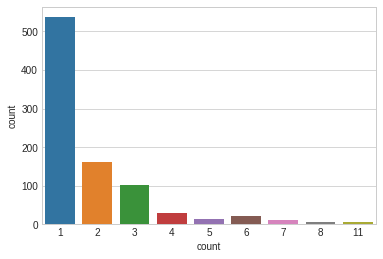

In [58]:
sns.countplot(x='count', data=fam)
plt.show()

In [59]:
pd.crosstab(fam['count'], fam['Survived'], margins=True).T

count,1,2,3,4,5,6,7,8,11,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


In [60]:
fam.groupby('count')['Survived'].mean()

count
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [61]:
fam['Pclass'] = rawData['Pclass']

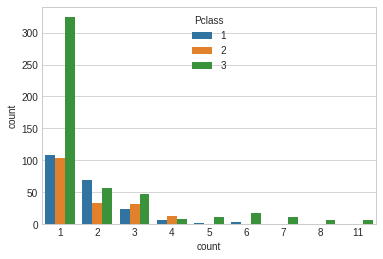

In [62]:
sns.countplot(x='count', hue='Pclass', data=fam)
plt.show()

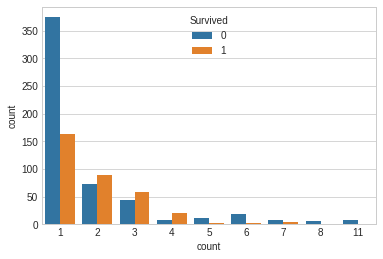

In [63]:
sns.countplot(x='count', hue='Survived', data=fam)
plt.show()

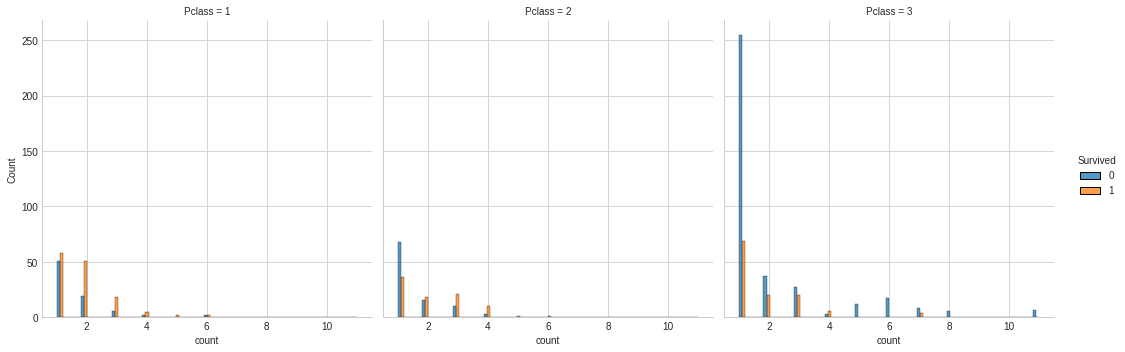

In [64]:
sns.displot(fam, x='count', hue='Survived', col='Pclass', multiple='dodge')
plt.show()

## 티켓 분석
- 같은 티켓번호를 가진 승객은 가족인가?
- 친구들끼리 같이 탄 경우

In [65]:
fam['ticket'] = rawData['Ticket']

In [66]:
fam['family name'] = rawData.Name.str.extract('([A-Za-z]+),')

In [67]:
fam.loc[fam.duplicated(subset=['ticket'], keep=False)].sort_values(by='ticket')

,count,Survived,Pclass,ticket,family name
257,1,1,1,110152,Cherry
759,1,1,1,110152,Rothes
504,1,1,1,110152,Maioni
262,3,0,1,110413,Taussig
558,3,1,1,110413,Taussig
...,...,...,...,...,...
736,5,0,3,W./C. 6608,Ford
86,5,0,3,W./C. 6608,Ford
147,5,0,3,W./C. 6608,Ford
540,3,1,1,WE/P 5735,Crosby


In [68]:
pd.set_option('display.max_rows', 300)
fam.loc[( fam.duplicated(subset=['ticket'], keep=False) ) & ( fam['count'] > 1 )].sort_values(by='ticket')

,count,Survived,Pclass,ticket,family name
262,3,0,1,110413,Taussig
558,3,1,1,110413,Taussig
585,3,1,1,110413,Taussig
329,2,1,1,111361,Hippach
523,2,1,1,111361,Hippach
356,2,1,1,113505,Bowerman
166,2,1,1,113505,Chibnall
390,4,1,1,113760,Carter
763,4,1,1,113760,Carter
435,4,1,1,113760,Carter


In [69]:
pd.set_option('display.max_rows', 300)
fam.loc[( fam.duplicated(subset=['ticket'], keep=False) ) & ( fam['count'] == 1 )].sort_values(by='ticket')

,count,Survived,Pclass,ticket,family name
257,1,1,1,110152,Cherry
504,1,1,1,110152,Maioni
759,1,1,1,110152,Rothes
475,1,0,1,110465,Clifford
110,1,0,1,110465,Porter
61,1,1,1,113572,Icard
829,1,1,1,113572,Stone
708,1,1,1,113781,Cleaver
842,1,1,1,113798,Serepeca
270,1,0,1,113798,Cairns


In [70]:
pd.set_option('display.max_rows', 500)
fam['middle name'] = name['middle name']
fam['cabin'] = rawData['Cabin']
fam['fare'] = rawData['Fare']
fam['age'] = rawData['Age']
fam.loc[( fam.duplicated(subset=['ticket'], keep=False) )].sort_values(by='ticket')

,count,Survived,Pclass,ticket,family name,middle name,cabin,fare,age
257,1,1,1,110152,Cherry,Miss,B77,86.5000,30.00
759,1,1,1,110152,Rothes,Countess,B77,86.5000,33.00
504,1,1,1,110152,Maioni,Miss,B79,86.5000,16.00
262,3,0,1,110413,Taussig,Mr,E67,79.6500,52.00
558,3,1,1,110413,Taussig,Mrs,E67,79.6500,39.00
585,3,1,1,110413,Taussig,Miss,E68,79.6500,18.00
110,1,0,1,110465,Porter,Mr,C110,52.0000,47.00
475,1,0,1,110465,Clifford,Mr,A14,52.0000,NaN
523,2,1,1,111361,Hippach,Mrs,B18,57.9792,44.00
329,2,1,1,111361,Hippach,Miss,B18,57.9792,16.00


In [71]:
fam.drop_duplicates(subset=['ticket'], keep=False)

,count,Survived,Pclass,ticket,family name,middle name,cabin,fare,age
0,2,0,3,A/5 21171,Braund,Mr,NaN,7.2500,22.0
1,2,1,1,PC 17599,Cumings,Mrs,C85,71.2833,38.0
2,1,1,3,STON/O2. 3101282,Heikkinen,Miss,NaN,7.9250,26.0
4,1,0,3,373450,Allen,Mr,NaN,8.0500,35.0
5,1,0,3,330877,Moran,Mr,NaN,8.4583,NaN
...,...,...,...,...,...,...,...,...,...
884,1,0,3,SOTON/OQ 392076,Sutehall,Mr,NaN,7.0500,25.0
886,1,0,2,211536,Montvila,Rev,NaN,13.0000,27.0
887,1,1,1,112053,Graham,Miss,B42,30.0000,19.0
889,1,1,1,111369,Behr,Mr,C148,30.0000,26.0


## 요금분석

In [72]:
fam[fam['fare'] < 5][['Survived']].value_counts()

Survived
0           15
1            1
dtype: int64

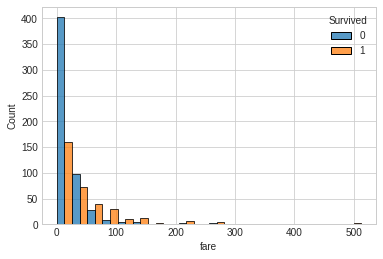

In [73]:
sns.histplot(data=fam, x='fare', hue='Survived', bins=20, multiple='dodge')
plt.show()

## 객실번호 분석

In [74]:
rawData['Cabin'].isna().sum()

687

In [75]:
rawData['Cabin'].notna().sum()

204

- 객실번호는 많이 유실되었다 라고 나옵니다. 
- 정말? 

In [76]:
rawData.loc[rawData['Cabin'].notna()][['Pclass']].value_counts()

Pclass
1         176
2          16
3          12
dtype: int64

In [77]:
rawData.loc[rawData['Cabin'].isna()][['Pclass']].value_counts()

Pclass
3         479
2         168
1          40
dtype: int64

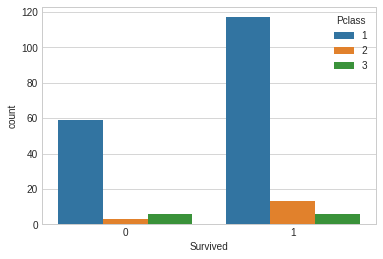

In [78]:
sns.countplot(data=rawData.loc[rawData['Cabin'].notna()], x='Survived', hue='Pclass')
plt.show()

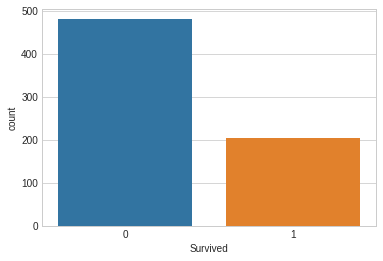

In [79]:
sns.countplot(data=rawData.loc[rawData['Cabin'].isna()], x='Survived')
plt.show()

In [80]:
rawData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 승선지

In [81]:
rawData['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
pd.crosstab(rawData['Embarked'], rawData['Pclass'], margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


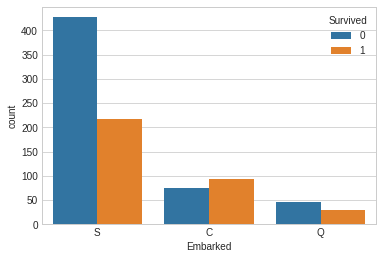

In [83]:
sns.countplot(data=rawData, x='Embarked', hue='Survived')
plt.show()

In [84]:
rawData[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


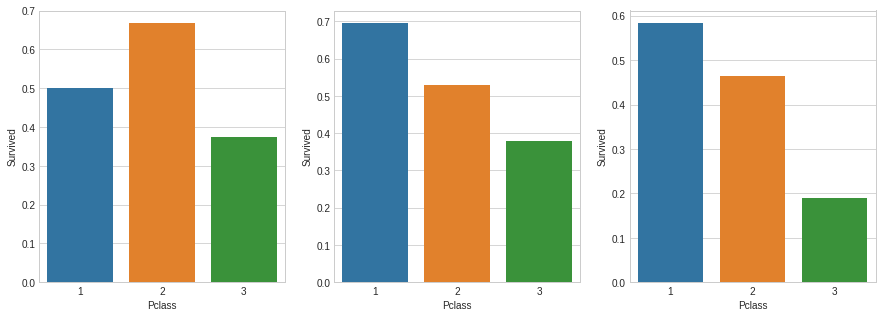

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(data=rawData[rawData['Embarked'] == 'Q'], x='Pclass', y='Survived', ci=False)

plt.subplot(1,3,2)
sns.barplot(data=rawData[rawData['Embarked'] == 'C'], x='Pclass', y='Survived', ci=False)

plt.subplot(1,3,3)
sns.barplot(data=rawData[rawData['Embarked'] == 'S'], x='Pclass', y='Survived', ci=False)

plt.show()

In [86]:
train = pd.read_csv('./python/data/train.csv')
test = pd.read_csv('./python/data/test.csv')

In [112]:
# rawData = pd.concat([train, test], axis=0, ignore_index=True)
rawData = pd.concat([train, test], axis=0)

In [117]:
rawData.set_index('PassengerId', inplace=True)

In [118]:
rawData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# Feature Engineering
- 기존 변수에서 파생변수를 새로 생성

## Pclass
- 범주형 변수(순위)
- 범주에 따라서 영향이 다르게 나타난다.(연속형 처럼)
- Pclass가 낮을수록 생존에 유리하다

In [177]:
dataFe = pd.DataFrame()

In [178]:
dataFe['Pclass'] = rawData['Pclass']

## Name   
- 미들네임에 대해서 계급별로 구분
- 계급이 높을수록 생존에 더 유리했을 것    


1. 귀족(Noble)
    - Mlle, Lady, Mme, Countess, Sir
    
2. 희생(sacrifice)
    - Capt, Rev
    
3. 명에(honor)
    - Dr, Col, Major, Master
    
4. 그외
    - Don, Dona, Jonkheer, Miss, Ms, Mrs, Mr
    - 남녀로 구분

In [179]:
dataFe['Title'] = rawData.Name.str.extract('([A-Za-z]+)\.')

In [180]:
dataFe['Class'] = dataFe['Title'].replace(
    ['Countess', 'Lady', 'Mlle', 'Mme', 'Sir', 'Capt', 'Rev', 'Dr', 'Col', 'Major', 'Master',
     'Don', 'Dona', 'Jonkheer', 'Miss', 'Ms', 'Mrs', 'Mr'],
    ['Noble', 'Noble', 'Noble', 'Noble', 'Noble', 'Sacrifice', 'Sacrifice', 'Honor', 'Honor', 'Honor', 'Honor',
     'Mr', 'Ms', 'Mr', 'Ms', 'Ms', 'Ms', 'Mr']
)

In [181]:
dataFe['Class'].value_counts()

Mr           759
Ms           460
Honor         75
Sacrifice      9
Noble          6
Name: Class, dtype: int64

In [182]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
dataFe['Class2'] = encode.fit_transform(dataFe['Class'])

In [183]:
dataFe[['Class', 'Class2']].value_counts()

Class      Class2
Mr         1         759
Ms         2         460
Honor      0          75
Sacrifice  4           9
Noble      3           6
dtype: int64

In [184]:
dataFe['Class2'] = dataFe['Class'].replace(
    ['Noble', 'Ms', 'Honor', 'Mr', 'Sacrifice'],
    [1, 2, 3, 4, 5]
)

In [185]:
dataFe['Class2'].value_counts()

4    759
2    460
3     75
5      9
1      6
Name: Class2, dtype: int64

## Age
- 결측치 처리(지우거나, 채우거나)
- 여기서는 적당한 값으로 채워주는 방향

In [186]:
rawData['Age'].isna().sum()

263

In [187]:
dataFe['Age'] = rawData['Age']

In [188]:
dataFe.groupby('Title').agg({
    'Age':['mean', 'count']
})

Age      
               mean count
Title                    
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dona      39.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       36.994118   170
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [189]:
dataFe['Age'] = dataFe.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))

- 결측치는 미들네임별로 평균을 구해 채워주는 방식을 사용하였다. 

In [190]:
dataFe.Age.isna().sum() # 결측치가 채워진것을 확인할 수 있다. 

0

### 나이가 아주 어린 승객(영유아)들은 성별과 상관 없이 생존율이 높지 않았을까?

In [191]:
rawData[rawData['Age'] <= 2][['Survived']].value_counts()

Survived
1.0         15
0.0          9
dtype: int64

In [192]:
rawData[rawData['Age'] < 1][['Survived']].value_counts()

Survived
1.0         7
dtype: int64

- 1세 미만의 승객은 성별, Pclass, 계급 등과 무관하게 모두 생존하였다. 

In [193]:
dataFe['Sex'] = rawData['Sex']

In [194]:
dataFe.Sex.isna().sum()

0

In [195]:
dataFe.Sex.unique()

array(['male', 'female'], dtype=object)

In [218]:
dataFe['Sex'] = dataFe['Sex'].mask(dataFe['Age'] < 1, other = 'baby')

In [199]:
dataFe.Sex.unique()

array(['male', 'female', 'baby'], dtype=object)

In [219]:
dataFe[['Baby', 'Female', 'Male']] = pd.get_dummies(dataFe['Sex'])

In [221]:
labels = ['Kids', '10s', '20s', '30s', '40s', '50s', '60s', 'Senior']
bins=[1, 10, 20, 30, 40, 50, 60, 70, 100]
dataFe['Age2'] = pd.cut(dataFe['Age'], bins=bins, labels=labels)

In [229]:
dataFe = pd.get_dummies(dataFe, columns=['Age2'], prefix='', prefix_sep='')

In [230]:
dataFe

,Pclass,Title,Class,Class2,Age,Sex,Baby,Female,Male,Kids,10s,20s,30s,40s,50s,60s,Senior
PassengerId,,,,,,,,,,,,,,,,,
1,3,Mr,Mr,4,22.000000,male,0,0,1,0,0,1,0,0,0,0,0
2,1,Mrs,Ms,2,38.000000,female,0,1,0,0,0,0,1,0,0,0,0
3,3,Miss,Ms,2,26.000000,female,0,1,0,0,0,1,0,0,0,0,0
4,1,Mrs,Ms,2,35.000000,female,0,1,0,0,0,0,1,0,0,0,0
5,3,Mr,Mr,4,35.000000,male,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,Mr,4,32.252151,male,0,0,1,0,0,0,1,0,0,0,0
1306,1,Dona,Ms,2,39.000000,female,0,1,0,0,0,0,1,0,0,0,0
1307,3,Mr,Mr,4,38.500000,male,0,0,1,0,0,0,1,0,0,0,0


## family

In [233]:
dataFe['Family'] = pd.DataFrame(rawData['SibSp'] + rawData['Parch'] + 1, columns=['count'])

In [236]:
dataFe = pd.get_dummies(dataFe, columns=['Family'])

In [238]:
dataFe

,Pclass,Title,Class,Class2,Age,Sex,Baby,Female,Male,Kids,...,Senior,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_8,Family_11
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,Mr,Mr,4,22.000000,male,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,Mrs,Ms,2,38.000000,female,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,Miss,Ms,2,26.000000,female,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,Mrs,Ms,2,35.000000,female,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,3,Mr,Mr,4,35.000000,male,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,Mr,4,32.252151,male,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1306,1,Dona,Ms,2,39.000000,female,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1307,3,Mr,Mr,4,38.500000,male,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Fare

In [239]:
dataFe['Fare'] = rawData['Fare']

In [240]:
dataFe

,Pclass,Title,Class,Class2,Age,Sex,Baby,Female,Male,Kids,...,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_8,Family_11,Fare
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,Mr,Mr,4,22.000000,male,0,0,1,0,...,0,1,0,0,0,0,0,0,0,7.2500
2,1,Mrs,Ms,2,38.000000,female,0,1,0,0,...,0,1,0,0,0,0,0,0,0,71.2833
3,3,Miss,Ms,2,26.000000,female,0,1,0,0,...,1,0,0,0,0,0,0,0,0,7.9250
4,1,Mrs,Ms,2,35.000000,female,0,1,0,0,...,0,1,0,0,0,0,0,0,0,53.1000
5,3,Mr,Mr,4,35.000000,male,0,0,1,0,...,1,0,0,0,0,0,0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,Mr,4,32.252151,male,0,0,1,0,...,1,0,0,0,0,0,0,0,0,8.0500
1306,1,Dona,Ms,2,39.000000,female,0,1,0,0,...,1,0,0,0,0,0,0,0,0,108.9000
1307,3,Mr,Mr,4,38.500000,male,0,0,1,0,...,1,0,0,0,0,0,0,0,0,7.2500


## Embarked

### 결측치 

In [251]:
rawData['Embarked'].isna().sum()

2

In [255]:
dataFe['Embarked'] = rawData['Embarked']

In [257]:
dataFe['Embarked'].isna().sum()

2

In [259]:
rawData.loc[rawData['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- 가족은 아니지만, 두 분이 함께 승선했음을 알 수 있다. 
- 즉, 두 분이 함께 탑승했을 가능성이 높다.

In [260]:
rawData.loc[rawData['Ticket'] == '113572']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- 함께 탑승한 또 다른, 승객이 있는지 확인

In [265]:
rawData.sort_values(['Ticket'])[30:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1132,NaN,1,"Lindstrom, Mrs. Carl Johan (Sigrid Posse)",female,55.0,0,0,112377,27.7208,NaN,C
1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
1260,NaN,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",female,45.0,0,1,112378,59.4000,NaN,C
767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
...,...,...,...,...,...,...,...,...,...,...,...
906,NaN,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S


- 비슷한 티켓번호일 경우 승선지가 비슷하지 않을까?
- 티켓번호는 그냥 패턴없이 제각각 이었다.

In [266]:
dataFe['Embarked'].fillna('S', inplace=True)

In [267]:
dataFe['Embarked'].isna().sum()

0

In [268]:
dataFe = pd.get_dummies(dataFe, columns=['Embarked'], prefix='', prefix_sep='')

In [269]:
dataFe

,Pclass,Class2,Baby,Female,Male,Kids,10s,20s,30s,40s,...,Family_4,Family_5,Family_6,Family_7,Family_8,Family_11,Fare,C,Q,S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,4,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,7.2500,0,0,1
2,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,71.2833,1,0,0
3,3,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,7.9250,0,0,1
4,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,53.1000,0,0,1
5,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,8.0500,0,0,1
1306,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,108.9000,1,0,0
1307,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,7.2500,0,0,1


# 정리

## 불필요한 항목 제거

In [270]:
dataFe.columns

Index(['Pclass', 'Class2', 'Baby', 'Female', 'Male', 'Kids', '10s', '20s',
       '30s', '40s', '50s', '60s', 'Senior', 'Family_1', 'Family_2',
       'Family_3', 'Family_4', 'Family_5', 'Family_6', 'Family_7', 'Family_8',
       'Family_11', 'Fare', 'C', 'Q', 'S'],
      dtype='object')

In [249]:
drop_columns=['Title', 'Class', 'Age', 'Sex']
dataFe.drop(columns=drop_columns, inplace=True)

In [250]:
dataFe

,Pclass,Class2,Baby,Female,Male,Kids,10s,20s,30s,40s,...,Family_4,Family_5,Family_6,Family_7,Family_8,Family_11,Fare,C,Q,S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,4,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,7.2500,0,0,1
2,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,71.2833,1,0,0
3,3,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,7.9250,0,0,1
4,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,53.1000,0,0,1
5,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,8.0500,0,0,1
1306,1,2,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,108.9000,1,0,0
1307,3,4,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,7.2500,0,0,1


## 파일 저장

In [271]:
dataFe['Survived'] = rawData['Survived']

In [ ]:
dataFe.to_csv('./data/titanic_preprocessed.csv', index=True, index_label='PassengerId', encoding='utf-8')

In [274]:
dataFe.to_csv('./titanic_preprocessed.csv', index=True, index_label='PassengerId', encoding='utf-8')